# Data vizualization on movie dataset

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

Vizualizing data helps to illustrate certain attributes of the dataset and display meaningful analytics

In [72]:
data_file = '../data/movieDB.csv'
movies_df = pd.read_csv(data_file)
movies_df.describe()

,url,title,original_title,year,country,genre,plot
count,7056,7056,7056,7056,7056,7056,7042
unique,3250,3214,3219,93,75,1465,3240
top,https://www.filmy.gr/movies-database/mulan-1998/,Αλαντίν,Aladdin,2018,ΗΠΑ,"Κινούμενα Σχέδια,Κωμωδία,Οικογενειακή,Περιπέτεια","Στη μεσαιωνική Κίνα, η νεαρή Μουλάν, η ιδιόρρυ..."
freq,8,14,14,777,4085,139,8


Data needs to be processed since there are duplicate records. Also the genre information needs to be more comprehensive.
Removing duplicates:

In [73]:
movies_df.drop_duplicates(inplace=True)
movies_df.describe()

,url,title,original_title,year,country,genre,plot
count,3251,3251,3251,3251,3251,3251,3241
unique,3250,3214,3219,93,75,1465,3240
top,https://www.filmy.gr/movies-database/the-forger/,Χαμένος Παράδεισος,Godzilla,2018,ΗΠΑ,Δραμεντί,"Το 1945, ο κινεζικός στρατός υπό τον στρατηγό ..."
freq,2,2,2,367,1846,71,2


Some movie genres happen to contain the county information, for movies where multiple countries were involved. The following code identifies such instances and appends the first element of genre, which happens to be the miss-classified country, to the country column. Afterwards the first element of genre is ommited.

In [74]:
missclassified_genres = [genres for genres in movies_df['genre'].values if genres.split(',')[0] in movies_df['country'].values]
print(missclassified_genres[:5])
# cleaning
while missclassified_genres:
    movies_df.loc[movies_df['genre'].isin(missclassified_genres), 'country'] += ',' + movies_df.loc[movies_df['genre'].isin(missclassified_genres), 'genre'].apply(lambda x: x.split(',')[0])
    movies_df.loc[movies_df['genre'].isin(missclassified_genres), 'genre'] = movies_df[movies_df['genre'].isin(missclassified_genres)]['genre'].apply(lambda x: ','.join(x.split(',')[1:]))
    missclassified_genres = [genres for genres in movies_df['genre'].values if genres.split(',')[0] in movies_df['country'].values]

missclassified_genres

['Δραματική,Σινεφίλ,Ταινία Δρόμου', 'Δραματική,Ντοκιουντράμα,Σινεφίλ', 'Μ. Βρετανία,Αισθηματική,Δραμεντί,Εποχής,Κομεντί', 'Δραματική,Εποχής,Θρησκευτική,Σινεφίλ', 'Δραματική,Σινεφίλ']


[]

We will attempt to generalize movie genres and agregate the various movie sub-genres to more inclusive and generic genres.

In [75]:
# Genre aggregation dictionary
genre_dict = {
    'Ιστορική': ['Ιστορική', 'Έπος',  'Πολεμικό Δράμα', 'Εποχής', 'Νουάρ', 'Πολιτική', 'Θρησκευτική', 'Ντοκιμαντέρ', 'Βιογραφία', 'Πολεμική', 'Ντοκιουντράμα', 'Κατασκοπική'],
    'Δραματική': ['Πολεμικό Δράμα', 'Δραματική', 'Δραματικό Θρίλερ', 'Αισθηματική', 'Μαύρη Κωμωδία', 'Σινεφίλ', 'Ντοκιουντράμα', 'Ερωτική'],
    'Θρίλερ': ['Θρίλερ', 'Τρόμου', 'Δραματικό Θρίλερ', 'Πολιτικό Θρίλερ', 'Μεταφυσικό Θρίλερ'],
    'Περιπέτεια':['Περιπέτεια', 'Επιστημονικής Φαντασίας', 'Δράσης', 'Υπερήρωες', 'Αστυνομική', 'Τέρατα', 'Πολεμικών Τεχνών', 'Πολεμική', 'Αθλητική', 'Μυστηρίου', 'Γουέστερν', 'Φαντασίας', 'Κατασκοπική', 'Καταστροφής', 'Γκανγκστερική'],
    'Κωμωδία': ['Κωμωδία', 'Κομεντί', 'Δραμεντί', 'Μαύρη Κωμωδία', 'Κινούμενα Σχέδια', 'Σάτιρα', 'Μιούζικαλ', 'Μουσική', 'Παρωδία', 'Νεανική', 'Οικογενειακή', 'Χορευτική',],
    'NAN': ['Tηλεταινία',  'Ταινία Δρόμου', '']
}

def genre_aggregation(genres=str):
    genre_list = genres.strip().split(',')
    # Create string of unique generalized genres
    aggregated_genres = ','.join(list(set([agg_genre for agg_genre in genre_dict for genre in genre_list if genre in genre_dict[agg_genre]])))
    return aggregated_genres

In [76]:
movies_df.loc[:, 'genre'] = movies_df['genre'].apply(lambda x: genre_aggregation(x))
movies_df.head()

,url,title,original_title,year,country,genre,plot
0,https://www.filmy.gr/movies-database/the-night...,Τη Νύχτα που ο Φερνάντο Πεσσόα Συνάντησε τον Κ...,Τη Νύχτα που ο Φερνάντο Πεσσόα Συνάντησε τον Κ...,2008,Ελλάδα,"Ιστορική,Δραματική","Στις 21 Οκτωβρίου του 1929, το υπερωκεάνιο Sat..."
1,https://www.filmy.gr/movies-database/king-arthur/,Βασιλιάς Αρθούρος,King Arthur,2004,ΗΠΑ,"Ιστορική,Περιπέτεια",Ο Αρθούρος διοικεί μια ομάδα ιπποτών για λογαρ...
2,https://www.filmy.gr/movies-database/pavarotti/,Παβαρότι,Pavarotti,2019,ΗΠΑ,"Κωμωδία,Ιστορική",Συνδυάζοντας στιγμές από τη ζωή και την καριέρ...
3,https://www.filmy.gr/movies-database/this-beau...,Ο Φανταστικός Κόσμος της Μπέλα,This Beautiful Fantastic,2016,Μ. Βρετανία,"Κωμωδία,Δραματική","Η Μπέλα Μπράουν είναι μια φαντασιόπληκτη, όσο ..."
4,https://www.filmy.gr/movies-database/earthquak...,Προάγγελμα Θανάτου,Earthquake Bird,2019,ΗΠΑ,"Θρίλερ,Ιστορική,Δραματική,Περιπέτεια","Τόκιο, 1989. Η Λούσι Φλάι, μια αινιγματική μετ..."


Making sense of movie genres. We will break up each element in the `genre` column and add it as a seperate column with a binary option for each record. The following code creates a list of all the genre lists, flattens it and gets the unique values.

In [77]:
# Get unique genre list
genre_list = list(set([genre  for genres in movies_df['genre'].values for genre in genres.strip().split(',')]))
genre_list

['Θρίλερ', 'Περιπέτεια', 'Δραματική', 'Κωμωδία', 'Ιστορική', 'NAN']

In [78]:
for genre in genre_list:
    movies_df[genre] = movies_df['genre'].apply(lambda x: 1 if genre in x.split(',') else 0) 

movies_df.head()    

,url,title,original_title,year,country,genre,plot,Θρίλερ,Περιπέτεια,Δραματική,Κωμωδία,Ιστορική,NAN
0,https://www.filmy.gr/movies-database/the-night...,Τη Νύχτα που ο Φερνάντο Πεσσόα Συνάντησε τον Κ...,Τη Νύχτα που ο Φερνάντο Πεσσόα Συνάντησε τον Κ...,2008,Ελλάδα,"Ιστορική,Δραματική","Στις 21 Οκτωβρίου του 1929, το υπερωκεάνιο Sat...",0,0,1,0,1,0
1,https://www.filmy.gr/movies-database/king-arthur/,Βασιλιάς Αρθούρος,King Arthur,2004,ΗΠΑ,"Ιστορική,Περιπέτεια",Ο Αρθούρος διοικεί μια ομάδα ιπποτών για λογαρ...,0,1,0,0,1,0
2,https://www.filmy.gr/movies-database/pavarotti/,Παβαρότι,Pavarotti,2019,ΗΠΑ,"Κωμωδία,Ιστορική",Συνδυάζοντας στιγμές από τη ζωή και την καριέρ...,0,0,0,1,1,0
3,https://www.filmy.gr/movies-database/this-beau...,Ο Φανταστικός Κόσμος της Μπέλα,This Beautiful Fantastic,2016,Μ. Βρετανία,"Κωμωδία,Δραματική","Η Μπέλα Μπράουν είναι μια φαντασιόπληκτη, όσο ...",0,0,1,1,0,0
4,https://www.filmy.gr/movies-database/earthquak...,Προάγγελμα Θανάτου,Earthquake Bird,2019,ΗΠΑ,"Θρίλερ,Ιστορική,Δραματική,Περιπέτεια","Τόκιο, 1989. Η Λούσι Φλάι, μια αινιγματική μετ...",1,1,1,0,1,0


In [79]:
movies_df.describe()

,Θρίλερ,Περιπέτεια,Δραματική,Κωμωδία,Ιστορική,NAN
count,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000
mean,0.308520,0.540449,0.478007,0.510305,0.414334,0.039680
std,0.461954,0.498438,0.499593,0.499971,0.492682,0.195237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


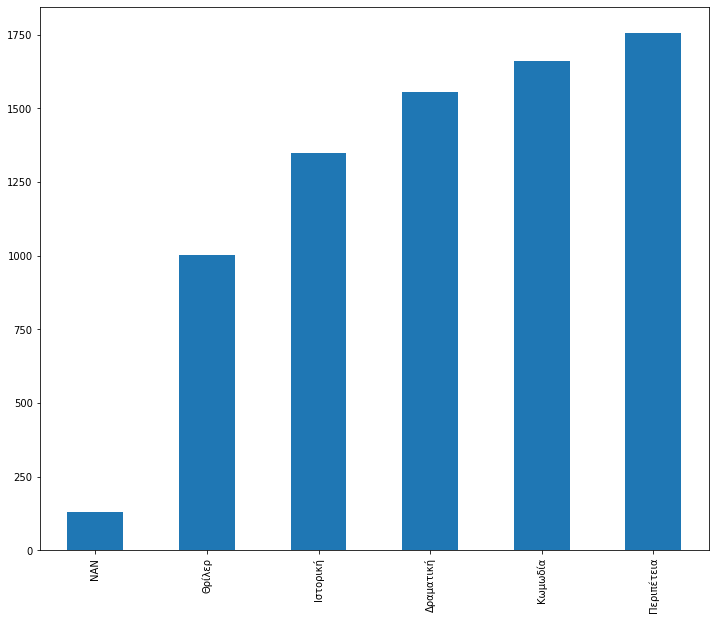

In [80]:
movies_df[genre_list].sum().sort_values().plot(kind='bar', figsize=(12,10),stacked=True)

Exporting cleaned data

In [81]:
movies_df.to_csv('../data/movieDB_clean.csv')